**Завдання 1.**


In [75]:
from sklearn.cluster import KMeans
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


K-means for MNIST dataset

In [58]:
mnist_df = pd.read_csv('data/mnist.csv',header=None )

clusters_mnist = []
distortion_mnist = []
mnist_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
for n_clusters in range(1,30):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto").fit(mnist_df)
    distortion_mnist.append(kmeans.inertia_)
    clusters_mnist.append(n_clusters)
 

Text(0.5, 1.0, 'elbow method representation')

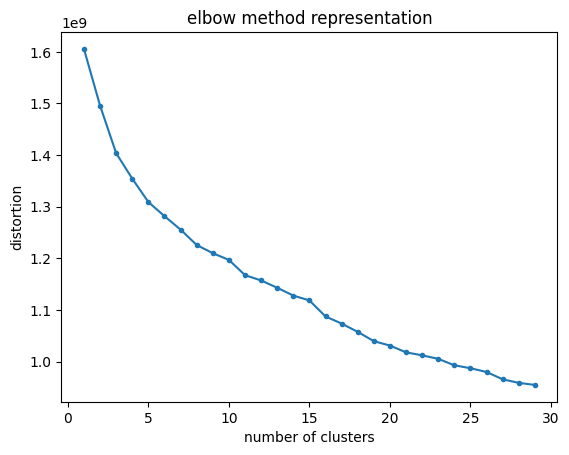

In [60]:
plt.plot( clusters_mnist, distortion_mnist, ".-"  )
plt.xlabel('number of clusters')
plt.ylabel('distortion')
plt.title('elbow method representation')

Отже, як можна побачити з графіку так званий згін ліктя відбувається на значенні 5, тому оптимальною кількістю кластерів для данного датасету буде 2. Але лікоть виражений не чітко, тому пропоную спробувати ще метод силуєтів

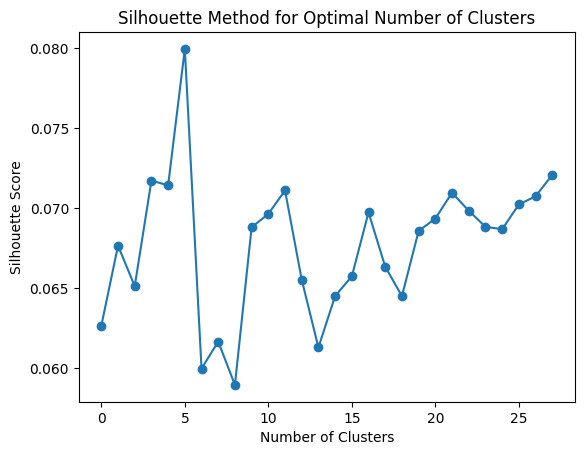

In [61]:
silhouette_scores = []

for n_clusters in range(2,30):

    kmeans_2 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans_2.fit_predict(mnist_df)
     
    score = silhouette_score(mnist_df, cluster_labels)
    silhouette_scores.append(score)

# Plot silhouette scores against number of clusters
plt.plot(  silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal Number of Clusters')
plt.show()

В цьому випадку вже чітко видно що оптимальна кількість кластерів це 5 оскільки найбільше значення silhouette_score приходиться на значення кількості кластерів 5

K-means for data_2d.csv

In [69]:
twod_df = pd.read_csv('data/data_2d.csv',header=None, usecols=[1,2] )

clusters_twod = []
distortion_twod = []
twod_df.head()

,1,2
0,-0.768716,0.460860
1,2.687848,2.366961
2,-0.201379,0.470430
3,0.608496,1.225400
4,-0.082282,1.137218


In [65]:
for n_clusters in range(1,30):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto").fit(twod_df)
    distortion_twod.append(kmeans.inertia_)
    clusters_twod.append(n_clusters)

Text(0.5, 1.0, 'elbow method representation')

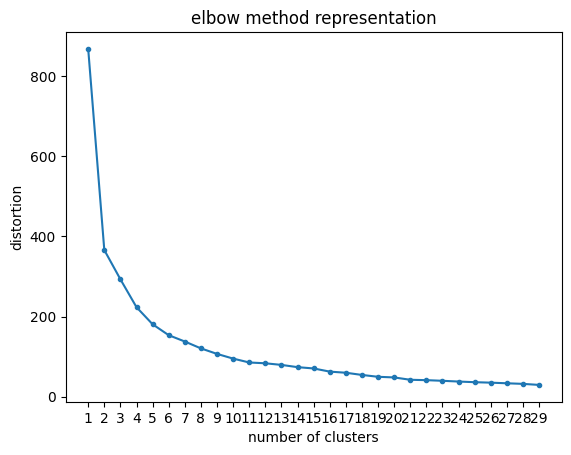

In [67]:
plt.plot( clusters_twod, distortion_twod, ".-"  )
plt.xticks(clusters_twod)
plt.xlabel('number of clusters')
plt.ylabel('distortion')
plt.title('elbow method representation')

В даному випадку чітко видно що оптимальна кількість кластерів це 5

**Завдання 2.**

Візуалізація алгоритму K-means для двовимірного датасету

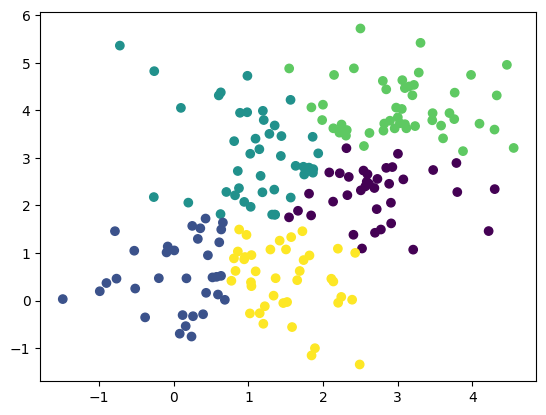

In [84]:
kmeans_twodf = KMeans(n_clusters=5, random_state=42, n_init="auto").fit_predict(twod_df)
plt.scatter(twod_df[1],twod_df[2], c = kmeans  )

Візуалізація алгоритму K-means для датасету MNIST

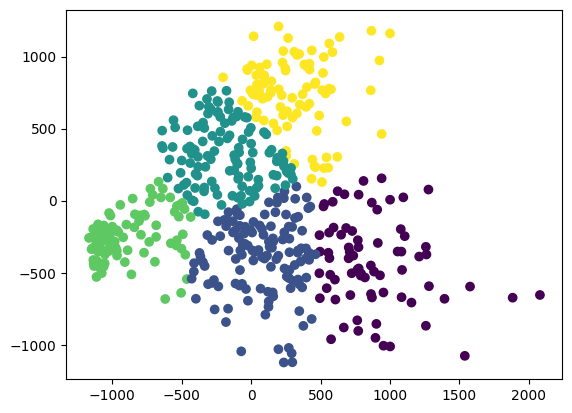

In [83]:
pca = PCA(n_components=2)
mnist_reduced= pca.fit_transform(mnist_df)
kmeans_mnist = KMeans(n_clusters=5, random_state=42, n_init="auto").fit_predict(mnist_reduced)

plt.scatter(mnist_reduced[:,0],mnist_reduced[:,1], c = kmeans_mnist )